How to set up TensorFlow GPU on Windows 10: <br>
https://medium.com/@soumyadipmajumder/complete-guide-to-tensorflow-gpu-installation-on-windows-10-36e5858640e9

In [3]:
import os
import shutil
import sys

from PIL import Image
sys.modules['Image'] = Image # solve PIL error from official notebook

import matplotlib.pyplot as plt

from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

Using TensorFlow backend.
C:\Users\g.gusarov\Anaconda3\envs\tf_gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\g.gusarov\Anaconda3\envs\tf_gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\g.gusarov\Anaconda3\envs\tf_gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\g.gusarov\Anaconda3\env

https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/5.2-using-convnets-with-small-datasets.ipynb

**Data preparation**

In [6]:
# # Main directories in Ubuntu
# original_train_dataset_dir = '/home/grigoriy/Desktop/dogs-vs-cats/train'
# original_test_dataset_dir = '/home/grigoriy/Desktop/dogs-vs-cats/test'
# base_dir = '/home/grigoriy/Desktop/dogs-vs-cats_small/'
# os.mkdir(base_dir)

In [19]:
# Main directories in Windows
original_train_dataset_dir = r'C:\Users\g.gusarov\Desktop\Datasets\dogs-vs-cats\train'
original_test_dataset_dir = r'C:\Users\g.gusarov\Desktop\Datasets\dogs-vs-cats\test'
base_dir = r'C:\Users\g.gusarov\Desktop\Datasets\dogs-vs-cats_small'
os.makedirs(base_dir)

In [21]:
# train/test/validation directories for cats/dogs
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [22]:
# In our cas we generate train/validation/test datasets from original train data only
# train_datasets - 1000
fnames_cat_train = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames_cat_train:
    src = os.path.join(original_train_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
fnames_dog_train = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames_dog_train:
    src = os.path.join(original_train_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst) 
    
# validation_dataset - next 500
fnames_cat_train = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames_cat_train:
    src = os.path.join(original_train_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
fnames_dog_train = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames_dog_train:
    src = os.path.join(original_train_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst) 

# test_dataset - next 500
fnames_cat_train = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames_cat_train:
    src = os.path.join(original_train_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
fnames_dog_train = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames_dog_train:
    src = os.path.join(original_train_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst) 

In [23]:
# Sanity check
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


**Simple convolutional network**

In [24]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', 
                        input_shape = (150, 150, 3))) #150x150 we get manually in next step
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy',
             optimizer = optimizers.RMSprop(lr = 1e-4),
             metrics = ['acc'])

W0827 18:23:07.011527 13820 deprecation_wrapper.py:119] From C:\Users\g.gusarov\Anaconda3\envs\tf_gpu\lib\site-packages\keras\backend\tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0827 18:23:07.026525 13820 deprecation_wrapper.py:119] From C:\Users\g.gusarov\Anaconda3\envs\tf_gpu\lib\site-packages\keras\backend\tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0827 18:23:07.029525 13820 deprecation_wrapper.py:119] From C:\Users\g.gusarov\Anaconda3\envs\tf_gpu\lib\site-packages\keras\backend\tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0827 18:23:07.044525 13820 deprecation_wrapper.py:119] From C:\Users\g.gusarov\Anaconda3\envs\tf_gpu\lib\site-packages\keras\backend\tensorflow_backend.py:4267: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0827 18:23:07.

In [25]:
# Data preparation. Convert image to ready-to-go batches of tensors
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [26]:
# more about fit_generator: https://keras.io/models/sequential/
# PIL error: https://stackoverflow.com/questions/48225729/importerrorcould-not-import-pil-image-working-with-keras-ternsorflow/50775336
history = model.fit_generator(
    generator = train_generator,
    steps_per_epoch = 100, # 20 batches * 100 steps per epochs = 2000 images (full train dataset)
    epochs = 30,
    validation_data = validation_generator,
    validation_steps = 50)

W0827 18:23:16.750124 13820 deprecation_wrapper.py:119] From C:\Users\g.gusarov\Anaconda3\envs\tf_gpu\lib\site-packages\keras\backend\tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/30
100/100 [==============================] - 10s 100ms/step - loss: 0.6931 - acc: 0.5310 - val_loss: 0.6780 - val_acc: 0.5170
Epoch 2/30
100/100 [==============================] - 6s 62ms/step - loss: 0.6594 - acc: 0.5930 - val_loss: 0.6398 - val_acc: 0.6230
Epoch 3/30
100/100 [==============================] - 6s 62ms/step - loss: 0.6075 - acc: 0.6550 - val_loss: 0.6198 - val_acc: 0.6470
Epoch 4/30
100/100 [==============================] - 6s 64ms/step - loss: 0.5625 - acc: 0.7025 - val_loss: 0.6034 - val_acc: 0.6710
Epoch 5/30
100/100 [==============================] - 6s 63ms/step - loss: 0.5370 - acc: 0.7295 - val_loss: 0.5928 - val_acc: 0.6710
Epoch 6/30
100/100 [==============================] - 6s 63ms/step - loss: 0.5094 - acc: 0.7410 - val_loss: 0.6177 - val_acc: 0.6700
Epoch 7/30
100/100 [==============================] - 6s 64ms/step - loss: 0.4875 - acc: 0.7620 - val_loss: 0.5777 - val_acc: 0.6960
Epoch 8/30
100/100 [==============================] - 6s 62ms/step 

In [27]:
model.save('cats_vs_dogs_small_1.h5')

In [28]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

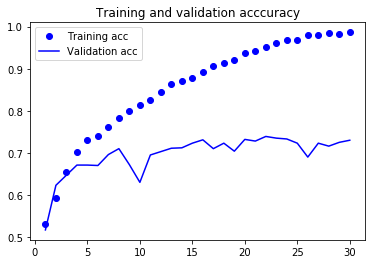

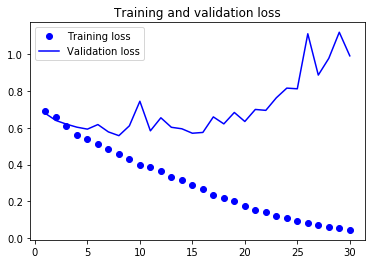

In [29]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs  = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation acccuracy')
plt.legend()

plt.show()
plt.clf()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


Overfit started near 8 epoch, accuracy stacked in 70%.

**Simple convolutional network with data augmentation and dropout before dense layers**

We can try to **use more data** to prevent early overfit. For this purpose we can use **data augmentation**.

Example of ImageGenerator with data augmentation

In [30]:
datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest')

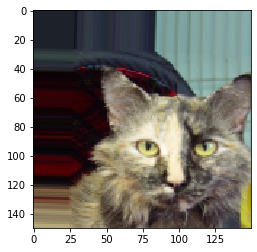

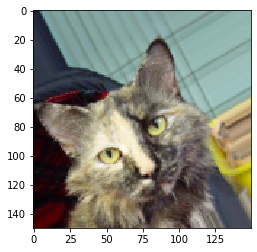

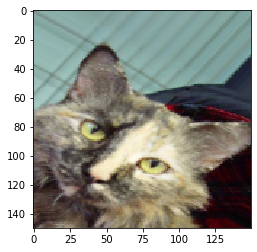

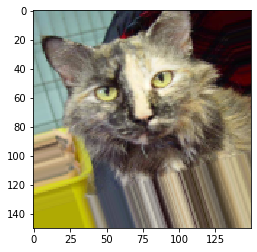

In [32]:
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[2]

img = image.load_img(img_path, target_size = (150, 150))
x = image.img_to_array(img) #numpy array (150, 150, 3)
x = x.reshape((1,) + x.shape) #numpy array (1, 150, 150, 3)

i = 0
for batch in datagen.flow(x, batch_size = 1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()
    


Let`s use it in our model

In [33]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

W0827 18:28:12.015833 13820 deprecation.py:506] From C:\Users\g.gusarov\Anaconda3\envs\tf_gpu\lib\site-packages\keras\backend\tensorflow_backend.py:3733: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [34]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 23s 229ms/step - loss: 0.6933 - acc: 0.5166 - val_loss: 0.6902 - val_acc: 0.4975
Epoch 2/100
100/100 [==============================] - 21s 208ms/step - loss: 0.6859 - acc: 0.5406 - val_loss: 0.6727 - val_acc: 0.5606
Epoch 3/100
100/100 [==============================] - 21s 208ms/step - loss: 0.6691 - acc: 0.5866 - val_loss: 0.6817 - val_acc: 0.5520
Epoch 4/100
100/100 [==============================] - 21s 212ms/step - loss: 0.6632 - acc: 0.5950 - val_loss: 0.6569 - val_acc: 0.6031
Epoch 5/100
100/100 [==============================] - 21s 207ms/step - loss: 0.6486 - acc: 0.6172 - val_loss: 0.6503 - val_acc: 0.6022
Epoch 6/100
100/100 [==============================] - 23s 228ms/step - loss: 0.6423 - acc: 0.6325 - val_loss: 0.6289 - val_acc: 0.6269
Epoch 7/100
100/100 [==============================] - 21s 208ms/step - loss: 0.6258 - acc: 0.6391 -

100/100 [==============================] - 20s 204ms/step - loss: 0.4167 - acc: 0.8072 - val_loss: 0.5595 - val_acc: 0.7157
Epoch 61/100
100/100 [==============================] - 20s 205ms/step - loss: 0.4142 - acc: 0.8091 - val_loss: 0.4249 - val_acc: 0.8086
Epoch 62/100
100/100 [==============================] - 21s 206ms/step - loss: 0.3974 - acc: 0.8212 - val_loss: 0.4307 - val_acc: 0.8096
Epoch 63/100
100/100 [==============================] - 21s 208ms/step - loss: 0.4177 - acc: 0.8109 - val_loss: 0.4264 - val_acc: 0.7951
Epoch 64/100
100/100 [==============================] - 20s 200ms/step - loss: 0.4145 - acc: 0.8028 - val_loss: 0.4121 - val_acc: 0.8215
Epoch 65/100
100/100 [==============================] - 20s 201ms/step - loss: 0.4199 - acc: 0.8069 - val_loss: 0.4440 - val_acc: 0.7970
Epoch 66/100
100/100 [==============================] - 21s 205ms/step - loss: 0.4090 - acc: 0.8116 - val_loss: 0.3718 - val_acc: 0.8389
Epoch 67/100
100/100 [==============================] 

In [35]:
model.save('cats_vs_dogs_small_2.h5')

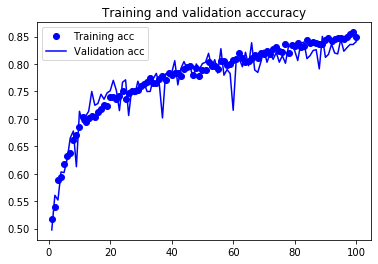

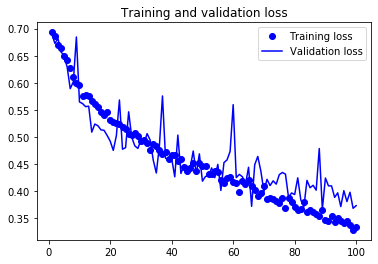

In [36]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs  = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation acccuracy')
plt.legend()

plt.show()
plt.clf()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()